<a href="https://colab.research.google.com/github/pierluigicosi/Fire-detection/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGETTO

In [1]:
# Clone
!git clone https://github.com/spacewalk01/Yolov5-Fire-Detection
%cd Yolov5-Fire-Detection/

# Install yolov5
!git clone https://github.com/ultralytics/yolov5  
!pip install -r ./yolov5/requirements.txt

#other requirements
import os
import cv2
import random
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Cloning into 'Yolov5-Fire-Detection'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 464 (delta 2), reused 0 (delta 0), pack-reused 458
Receiving objects: 100% (464/464), 46.90 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (254/254), done.
/content/Yolov5-Fire-Detection
Cloning into 'yolov5'...
remote: Enumerating objects: 12270, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 12270 (delta 5), reused 9 (delta 1), pack-reused 12250
Receiving objects: 100% (12270/12270), 12.02 MiB | 24.62 MiB/s, done.
Resolving deltas: 100% (8491/8491), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 10.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully un

In [2]:
#save the database
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/Colab\ Notebooks/fire /content/Yolov5-Fire-Detection/datasets

Mounted at /content/drive


In [ ]:
#WANDB STUFF
!pip install wandb
!wandb login

!faf43926e857c255bee00cf2fda6528402a17090wandb.init(project="my-test-firedetection-project")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.9 MB/s 
     |████████████████████████████████| 145 kB 66.2 MB/s 
     |████████████████████████████████| 181 kB 59.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=3d780b77ab93258b83f993e4faebb5bc34c99a557ee6f27781dfb4ad7bb8979a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
/bin/bash: -c: line 0: syntax error near 

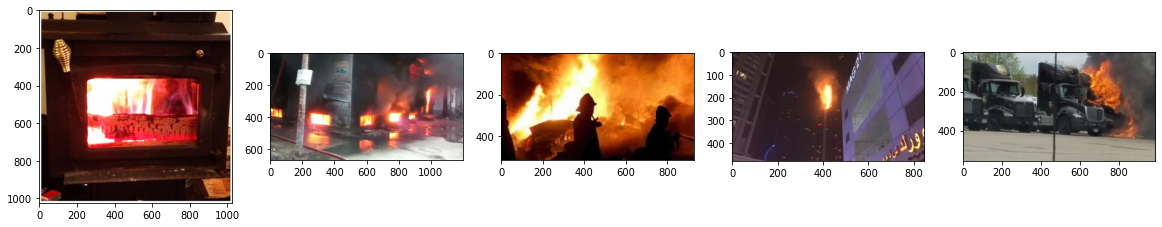

In [ ]:
#show some train images
img_folder = '/content/Yolov5-Fire-Detection/datasets/fire/train/images'
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(img)

In [ ]:
import torch
# Define the device to use: use the gpu runtime if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}') 

Using device: cpu


In [ ]:
#without weight
!python train.py --img 640 --batch 16 --epochs 50 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights '' --cache --device 0

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-256-gd605138 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

In [ ]:
#with pre trained weights
!python train.py --img 640 --batch 16 --epochs 50 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --device 0 --name pretrained_weight

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=weighted, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

In [ ]:
#batch size 32
!python train.py --img 640 --batch 32 --epochs 50 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --device 0 --name batch32

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.

In [ ]:
#yolov5m
!python train.py --img 640 --batch 16 --epochs 50 --data ../fire_config.yaml --cfg models/yolov5m.yaml --weights yolov5m.pt --cache --device 0 --name yolov5m

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=models/yolov5m.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.

In [3]:
#customize hyperparameter
%cd yolov5
import yaml
!touch data/hyps/hyp_custom.yaml
%cat data/hyps/hyp.scratch-med.yaml > data/hyps/hyp_custom.yaml

with open("data/hyps/hyp_custom.yaml", 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)

#custom parameter better
cfg['box'] = 0.02
cfg['obj'] = 0.5 
cfg['iou_t']=0.5


with open('data/hyps/hyp_custom.yaml', 'w') as f:
        yaml.dump(cfg, f)

/content/Yolov5-Fire-Detection/yolov5


In [4]:
#custom hyp
!python train.py --img 640 --batch-size 16 --epochs 40 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --device 0 --hyp data/hyps/hyp_custom.yaml --name custom_hyp

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp_custom.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=custom_hyp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: anchor_t=4.0, box=0.02, cls=0.3, cls_pw=1.0, copy_paste=0.0, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.5, lr0=0.01, lrf=0.1, mixup=0.1, momentum=0.937, mosaic=1.0, obj=0.

In [ ]:
#feature extraction freeze
!python train.py --img 640 --batch-size 32 --epochs 40 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --device 0 --hyp data/hyps/hyp_custom.yaml --name feature_extraction --freeze 10

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp_custom.yaml, epochs=40, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: anchor_t=4.0, box=0.02, cls=0.3, cls_pw=1.0, copy_paste=0.0, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.01

In [5]:
#customize hyperparameter for finetuning
%cat data/hyps/hyp_custom.yaml > data/hyps/hyp_finetune.yaml

with open("data/hyps/hyp_finetune.yaml", 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)

#custom parameter better
cfg['lr0']=0.001
cfg['weight_decay']=0.00025
cfg['momentum']=0.7


with open('data/hyps/hyp_finetune.yaml', 'w') as f:
        yaml.dump(cfg, f)

In [6]:
#fine tune no freeze (MIGLIORE)
!python train.py --img 640 --batch-size 16 --epochs 40 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights runs/train/custom_hyp/weights/best.pt --cache --device 0 --hyp data/hyps/hyp_finetune.yaml --name fine_tuning

train: weights=runs/train/custom_hyp/weights/best.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp_finetune.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=fine_tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: anchor_t=4.0, box=0.02, cls=0.3, cls_pw=1.0, copy_paste=0.0, degrees=0.0, fl_gamma=0.0, fliplr=0.5, flipud=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, iou_t=0.5, lr0=0.001, lrf=0.1, mixup=0.1, mom

In [ ]:
#fine tune freeze before
!python train.py --img 640 --batch-size 16 --epochs 40 --data ../fire_config.yaml --cfg models/yolov5s.yaml --weights runs/train/feature_extraction/weights/best.pt --cache --device 0 --hyp data/hyps/hyp_finetune.yaml --name fine_tuning_freeze

wandb: Currently logged in as: pierluigicosi. Use `wandb login --relogin` to force relogin
train: weights=runs/train/feature_extraction/weights/best.pt, cfg=models/yolov5s.yaml, data=../fire_config.yaml, hyp=data/hyps/hyp_finetune.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=fine_tuning_freeze, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: anchor_t=4.0, box=0.02, cls=0.3, cls_pw=1.0, copy_paste=0.0, degrees=0.0, fl_gamma=0.0

In [9]:
#validation
!python val.py --batch 64 --weights runs/train/fine_tuning/weights/best.pt --data ../fire_config.yaml --verbose --name validation

val: data=../fire_config.yaml, weights=['runs/train/fine_tuning/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validation, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
val: Scanning '/content/Yolov5-Fire-Detection/datasets/fire/val/labels.cache' images and labels... 150 found, 0 missing, 0 empty, 0 corrupt: 100% 150/150 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:08<00:00,  2.91s/it]
                 all        150        256       0.68      0.469      0.503      0.223
Speed: 0.2ms pre-process, 5.7ms inference, 2.3ms NMS per image at shape (64, 3, 640, 640)
R

In [10]:
#validation vecchio modello
!python val.py --batch 64  --weights ../models/best.pt --data ../fire_config.yaml --verbose --name validation_old

val: data=../fire_config.yaml, weights=['../models/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validation_old, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
val: Scanning '/content/Yolov5-Fire-Detection/datasets/fire/val/labels.cache' images and labels... 150 found, 0 missing, 0 empty, 0 corrupt: 100% 150/150 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:10<00:00,  3.65s/it]
                 all        150        256      0.538      0.414      0.452      0.189
Speed: 0.2ms pre-process, 9.7ms inference, 2.5ms NMS per image at shape (64, 3, 640, 640)
Results saved to run

In [ ]:
#detection
!python detect.py --source ../datasets/fire/test/images/ --img 640 --augment --conf 0.6 --img 512 --weights runs/train/fine_tuning/weights/best.pt --device 0 --name detect_photo

detect: weights=['runs/train/fine_tuning/weights/best.pt'], source=../datasets/fire/test/images/, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=detect_customhyp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/89 /content/Yolov5-Fire-Detection/datasets/fire/test/images/fire.103.png: 288x512 1 fire, Done. (0.045s)
image 2/89 /content/Yolov5-Fire-Detection/datasets/fire/test/images/fire.109.png: 320x512 1 fire, Done. (0.044s)
image 3/89 /content/Yolov5-Fire-Detection/datasets/fire/test/images/fire.135.png: 352x512 Done. (0.050s)
image 4/89

In [17]:
#GRADIO APP

!pip install gradio -q
import gradio as gr
import torch
from PIL import Image

# Model
model = torch.hub.load('.', 'custom', 'runs/train/fine_tuning/weights/best.pt', source='local',force_reload=True)  # local repo


def yolo(im, size=640):
    g = (size / max(im.size))  # gain
    im = im.resize((int(x * g) for x in im.size), Image.ANTIALIAS)  # resize

    results = model(im)  # inference
    results.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results.imgs[0])


inputs = gr.inputs.Image(type='pil', label="Original Image")
outputs = gr.outputs.Image(type="pil", label="Output Image")

title = "YOLOv5 Fire Detection"
description = "YOLOv5 demo for fire detection. Upload an image or click an example image to use."
article = "<p style='text-align: center'>YOLOv5 is a family of compound-scaled object detection models trained on the COCO dataset, and includes " \
          "simple functionality for Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, " \
          "and export to ONNX, CoreML and TFLite. <a href='https://github.com/ultralytics/yolov5'>Source code</a> |" \
          "<a href='https://apps.apple.com/app/id1452689527'>iOS App</a> | <a href='https://pytorch.org/hub/ultralytics_yolov5'>PyTorch Hub</a></p>"

examples = [['../datasets/fire/test/images/fire.103.png'], ['../datasets/fire/test/images/fire.109.png']]
gr.Interface(yolo, inputs, outputs, title=title, description=description, article=article, examples=examples).launch(
    debug=True)

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/Yolov5-Fire-Detection/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


Connected (version 2.0, client OpenSSH_7.6p1)
Authentication (publickey) successful!


Running on public URL: https://50236.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7eff0a5eb7d0>,
 'http://127.0.0.1:7860/',
 'https://50236.gradio.app')